In [2]:
%pip install fashion-clip
%pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 31.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.

In [42]:
from fashion_clip.fashion_clip import FashionCLIP
import os
import numpy as np
fclip = FashionCLIP('fashion-clip')

image_names = [str(n) + ".jpg" for n in range(1000) if os.path.exists(str(n) + ".jpg")]

# we create image embeddings and text embeddings
image_embeddings2 = fclip.encode_images(image_names, batch_size=32)
image_embeddings2 = image_embeddings2/np.linalg.norm(image_embeddings2, ord=2, axis=-1, keepdims=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
26it [04:39, 10.76s/it]


In [39]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image

print("Generating model...")

# Inicializar MobileNet pre-entrenado
model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

print("Preparing images...")

# Obtener nombres de imágenes existentes
image_names = [str(n) + ".jpg" for n in range(1000) if os.path.exists(str(n) + ".jpg")]

# Función para cargar y preprocesar las imágenes
def load_and_preprocess_images(image_names):
    images = []
    for image_name in image_names:
        if os.path.exists(image_name):
            # Cargar la imagen y redimensionarla a 224x224 píxeles
            img = image.load_img(image_name, target_size=(224, 224))
            img_array = image.img_to_array(img)
            images.append(img_array)
    # Convertir la lista de imágenes a un array NumPy
    images = np.array(images)
    # Preprocesar las imágenes según las especificaciones de MobileNet
    images = preprocess_input(images)
    return images

# Cargar las imágenes y preprocesarlas
images = load_and_preprocess_images(image_names)

print("Finding embeddings...")

# Generar los embeddings de las imágenes utilizando MobileNet
image_embeddings = model.predict(images)

# Aplanar los embeddings
image_embeddings = np.reshape(image_embeddings, (image_embeddings.shape[0], -1))

# Normalizar los embeddings
image_embeddings /= np.linalg.norm(image_embeddings, ord=2, axis=-1, keepdims=True)

Generating model...
Preparing images...
Finding embeddings...
26/26 [==============================] - 37s 1s/step


In [52]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image

print("Generating model...")

# Inicializar EfficientNetB0 pre-entrenado
model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

print("Preparing images...")

# Obtener nombres de imágenes existentes
image_names = [str(n) + ".jpg" for n in range(1000) if os.path.exists(str(n) + ".jpg")]

# Función para cargar y preprocesar las imágenes
def load_and_preprocess_images(image_names):
    images = []
    for image_name in image_names:
        if os.path.exists(image_name):
            # Cargar la imagen y redimensionarla a 224x224 píxeles
            img = image.load_img(image_name, target_size=(224, 224))
            img_array = image.img_to_array(img)
            images.append(img_array)
    # Convertir la lista de imágenes a un array NumPy
    images = np.array(images)
    # Preprocesar las imágenes según las especificaciones de EfficientNet
    images = preprocess_input(images)
    return images

# Cargar las imágenes y preprocesarlas
images = load_and_preprocess_images(image_names)

print("Finding embeddings...")

# Generar los embeddings de las imágenes utilizando EfficientNetB0
image_embeddings3 = model.predict(images)

# Aplanar los embeddings
image_embeddings3 = np.reshape(image_embeddings3, (image_embeddings3.shape[0], -1))

# Normalizar los embeddings
image_embeddings3 /= np.linalg.norm(image_embeddings3, ord=2, axis=-1, keepdims=True)


Generating model...
16705208/16705208 [==============================] - 0s 0us/step
Preparing images...
Finding embeddings...
26/26 [==============================] - 67s 2s/step


In [56]:
import faiss

# we create an index
index = faiss.IndexFlatIP(image_embeddings.shape[1])
index.add(image_embeddings)

# we search for the nearest neighbors of the third image
D, I = index.search(image_embeddings[155:156], 5)

print(I)

[[155 769 112 121  21]]


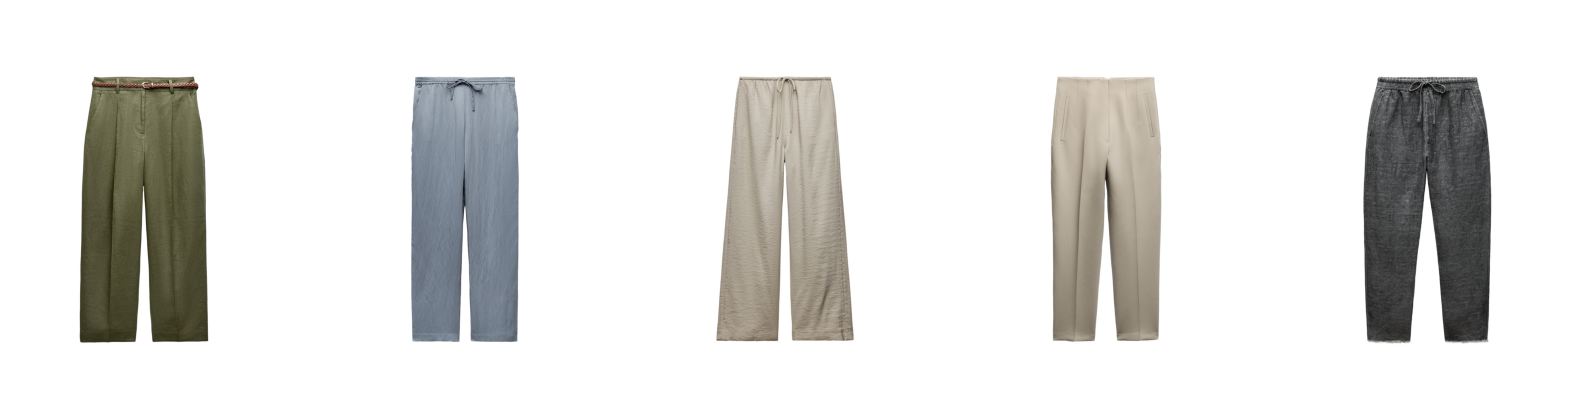

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20, 10))
for i, idx in enumerate(I[0]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mpimg.imread(image_names[idx]))
    plt.axis('off')
plt.show()

In [58]:
import faiss

# we create an index
index = faiss.IndexFlatIP(image_embeddings2.shape[1])
index.add(image_embeddings2)

# we search for the nearest neighbors of the third image
D, I = index.search(image_embeddings2[155:156], 5)

print(I)

[[155 766 527 264 180]]


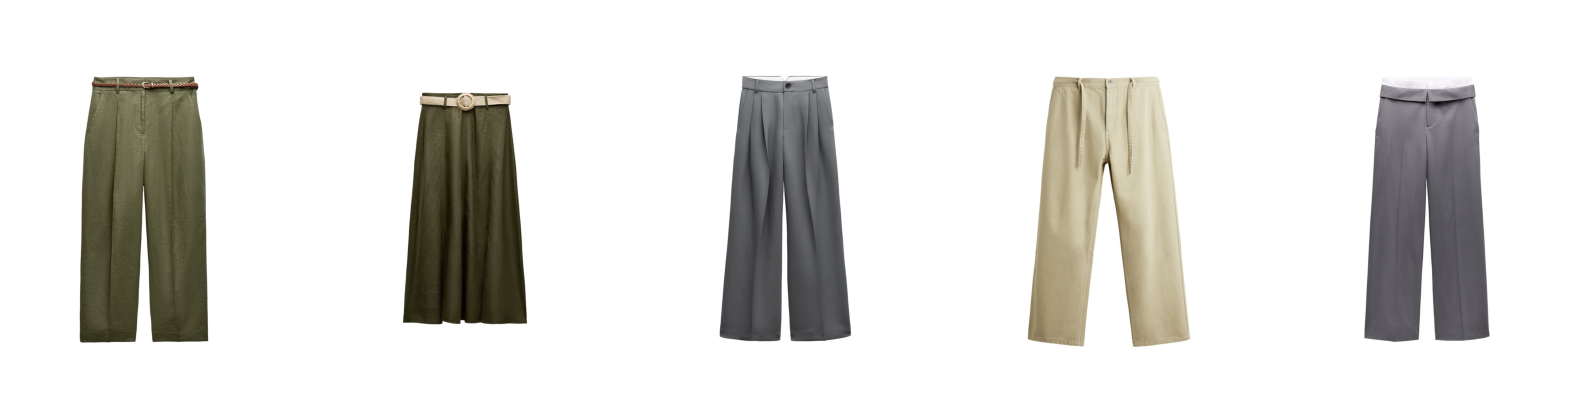

In [59]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20, 10))
for i, idx in enumerate(I[0]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mpimg.imread(image_names[idx]))
    plt.axis('off')
plt.show()

In [60]:
import faiss

# we create an index
index = faiss.IndexFlatIP(image_embeddings3.shape[1])
index.add(image_embeddings3)

# we search for the nearest neighbors of the third image
D, I = index.search(image_embeddings3[155:156], 5)

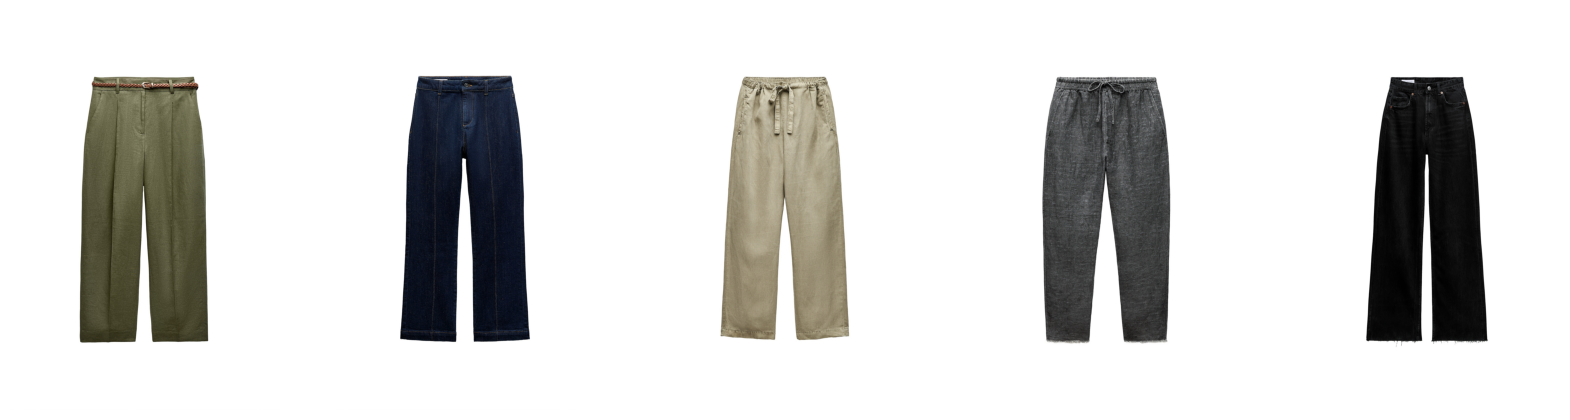

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20, 10))
for i, idx in enumerate(I[0]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mpimg.imread(image_names[idx]))
    plt.axis('off')
plt.show()